In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


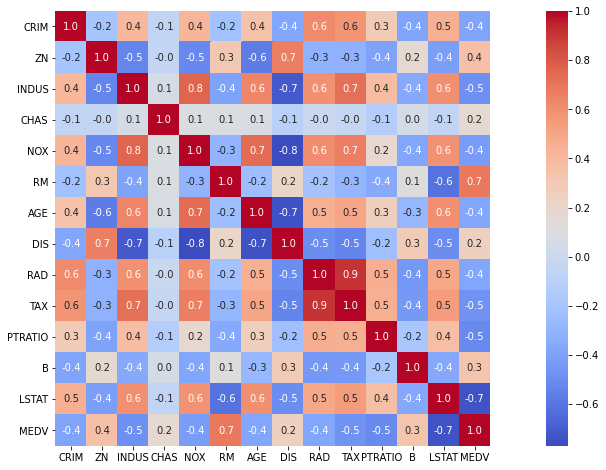

In [4]:
# Матрица корреляций, чтобы выяснить, какие признаки наиболее весомы.
corr = data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='coolwarm')

#### Большое кол-во работников более низкого класса говорит о том, что здесь живут люди с меньшим доходом => стоимость жилья ниже, на матрице корреляций видно, что LSTAT обратнопропорциональна MEDV.
#### RM - большое кол-во комнат обычно означает бОльшую площадь жилья => стоимость выше.

In [5]:
X = data[['RM','LSTAT']]
y = data['MEDV']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_train)

In [9]:
print('R^2:', metrics.r2_score(y_train, y_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))

R^2: 0.6486379416291157
MAE: 3.9367292153103097


#### Можно также предположить, что важной переменной является 'PTRATIO', так как повышенное количество учеников может говорить о более низкой стоимости жилья.

In [10]:
X = data[['RM','LSTAT','PTRATIO']]
y = data['MEDV']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_train)

In [14]:
print('R^2:', metrics.r2_score(y_train, y_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))

R^2: 0.6850018441906278
MAE: 3.6950990395279786


#### Роскошно! Качество модели улучшилось! Теперь можно попробовать перебрать разные наборы признаков и проследить, как улучшается качество с добавлением новых переменных.

In [16]:
features = []
for i in data.columns[0:13]:
    features.append(i)
    X = data[features]
    y = data['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print('feature added:', i)
    print('R^2:', metrics.r2_score(y_train, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_train, y_pred))

feature added: CRIM
R^2: 0.14474430351351975
MAE: 6.376831078310842
feature added: ZN
R^2: 0.21071774433678225
MAE: 5.92818662003998
feature added: INDUS
R^2: 0.266855406499796
MAE: 5.670996738145769
feature added: CHAS
R^2: 0.3265224381093873
MAE: 5.57927312049229
feature added: NOX
R^2: 0.3293122373783529
MAE: 5.544354216453022
feature added: RM
R^2: 0.5862061332628719
MAE: 4.183852821473095
feature added: AGE
R^2: 0.5888601869751087
MAE: 4.110104096669968
feature added: DIS
R^2: 0.6226605855357896
MAE: 3.9447762598781435
feature added: RAD
R^2: 0.6261140822777973
MAE: 3.896230985692731
feature added: TAX
R^2: 0.6309918234495991
MAE: 3.858105007015288
feature added: PTRATIO
R^2: 0.6624474582697437
MAE: 3.666612464582725
feature added: B
R^2: 0.6793846505896376
MAE: 3.5515713414113628
feature added: LSTAT
R^2: 0.7434997532004697
MAE: 3.3568267821682007


#### Можно заметить, что наиболее резкое уменьшение средней абсолютной ошибки происходит при добавлениее 'RM', 'PTRATIO' и 'LSTAT'.

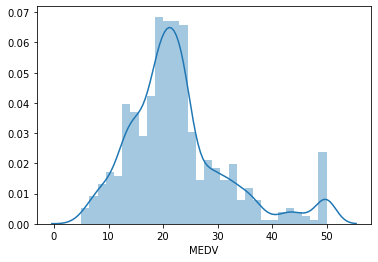

In [17]:
sns.set
sns.distplot(data['MEDV'], bins=30)
plt.show()

#### На графике видно, что 'MEDV' являет собой нормальное распределение. Можно допустить, что значения 50 являются выбросами.

In [18]:
# Попробуем удалить данные значения:
data = data.loc[data['MEDV'] != 50.0]
len(data)

490

In [19]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_train)

In [23]:
print('R^2:', metrics.r2_score(y_train, y_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))

R^2: 0.7798306337503476
MAE: 2.79615041471407


#### Ошибка уменьшилась еще на 0.56